In [1]:
import pandas as pd
import os
import tensorflow as tf

#Load the data file into a Pandas Dataframe
symptom_data = pd.read_csv("root_cause_analysis.csv")

#Explore the data loaded
print(symptom_data.dtypes)
symptom_data.head()

ID                   int64
CPU_LOAD             int64
MEMORY_LEAK_LOAD     int64
DELAY                int64
ERROR_1000           int64
ERROR_1001           int64
ERROR_1002           int64
ERROR_1003           int64
ROOT_CAUSE          object
dtype: object


,ID,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003,ROOT_CAUSE
0,1,0,0,0,0,1,0,1,MEMORY_LEAK
1,2,0,0,0,0,0,0,1,MEMORY_LEAK
2,3,0,1,1,0,0,1,1,MEMORY_LEAK
3,4,0,1,0,1,1,0,1,MEMORY_LEAK
4,5,1,1,0,1,0,1,0,NETWORK_DELAY


In [2]:
len(symptom_data)

1000

In [3]:
from sklearn import preprocessing 

In [28]:
Encoder = preprocessing.LabelEncoder()
target_var = Encoder.fit_transform(symptom_data["ROOT_CAUSE"])
target_var

array([1, 1, 1, 1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 1,
       0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 2, 2, 2, 1, 0, 2, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2,
       0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0,
       1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 0,
       0, 1, 0, 2, 1, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 2, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 2, 0,
       2, 0, 2, 0, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0,
       0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 1,

In [29]:
target_var = tf.keras.utils.to_categorical(target_var)
target_var

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [30]:
X_data = symptom_data.iloc[:,1:-1]
X_data

,CPU_LOAD,MEMORY_LEAK_LOAD,DELAY,ERROR_1000,ERROR_1001,ERROR_1002,ERROR_1003
0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,1
2,0,1,1,0,0,1,1
3,0,1,0,1,1,0,1
4,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,1
996,0,0,0,1,0,0,0
997,1,1,1,0,0,0,0
998,0,1,1,1,1,0,0


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test, Y_train,Y_test = train_test_split(X_data,target_var,test_size=0.2)

In [33]:
Y_train

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [36]:
from tensorflow import keras

NB_classes = 3

model= tf.keras.Sequential()
model.add(keras.layers.Dense(256,input_shape=(7,),
                                name='HL-1',
                            activation='relu'))

model.add(keras.layers.Dense(256, name= 'HL-2',
                             activation='relu'))

model.add(keras.layers.Dense(NB_classes, name='OL',
                             activation='softmax'))

model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 HL-1 (Dense)                (None, 256)               2048      
                                                                 
 HL-2 (Dense)                (None, 256)               65792     
                                                                 
 OL (Dense)                  (None, 3)                 771       
                                                                 
Total params: 68,611
Trainable params: 68,611
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
10/10 [==============================] - 0s 4ms/step - loss: 0.2464 - accuracy: 0.8875 - val_loss: 0.4251 - val_accuracy: 0.7937
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2458 - accuracy: 0.8875 - val_loss: 0.4298 - val_accuracy: 0.7937
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 0.2457 - accuracy: 0.8875 - val_loss: 0.4382 - val_accuracy: 0.7937
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.8875 - val_loss: 0.4315 - val_accuracy: 0.7937
Epoch 5/20
10/10 [==============================] - 0s 4ms/step - loss: 0.2478 - accuracy: 0.8875 - val_loss: 0.4371 - val_accuracy: 0.7937
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2480 - accuracy: 0.8875 - val_loss: 0.4333 - val_accuracy: 0.7937
Epoch 7/20
10/10 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.8875 - val_loss: 0.4370 - val_accuracy: 0.7937
Epoch 8/20
10/10 [==

[0.37660953402519226, 0.8700000047683716]

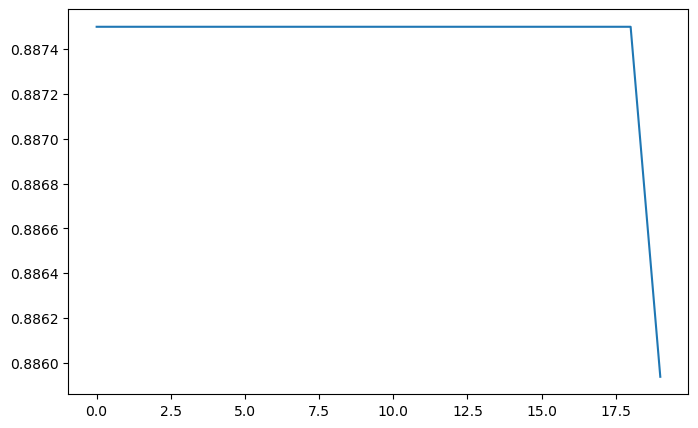

In [42]:
verbose=1
epoch=20
batch= 64
validation_split=0.2

history = model.fit(X_train,Y_train,verbose=verbose,epochs=epoch,batch_size=batch,validation_split=validation_split)

import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))

model.evaluate(X_test,Y_test)